## Kelompok 7
### Anggota Kelompok:
1. Faiz Bayu Erlangga (2311231)
2. Marco Henrik Abineno (2301093)
3. Muhammad Alfi Fariz (2311174)
4. Naufal Dzaki Ibrahim (2309815)
5. Qalam Noer Fazrian (2304746)

### Kelas: 3KOMC2

### Mata Kuliah: IK505 - Data Mining and Warehouse

### Dosen Pengampu: Dr. Yudi Wibisono, S.T., M.T.


# Pendahuluan
Dalam dataframe ini termuat informasi tentang sesi interaksi pelanggan dengan platform e-commerce, mencatat berbagai detail tentang aktivitas pengguna, produk yang diklik, produk yang dimasukkan ke keranjang, hingga hasil akhir dari sesi tersebut (pembelian atau tidak). Setiap kolom dalam DataFrame mewakili aspek tertentu dari perilaku dan karakteristik pelanggan selama sesi berlangsung, mulai dari waktu dan durasi interaksi, jumlah produk yang diklik, rentang harga produk, hingga data demografis pelanggan seperti usia, skor evaluasi dari sudut pandang toko, status online, dan informasi lainnya.

DataFrame ini memiliki struktur yang beragam, dengan beberapa kolom yang berisi nilai kontinu, nilai diskrit, dan string, serta beberapa kolom yang mungkin berisi nilai kosong atau tidak lengkap. Nilai kosong ini muncul karena beberapa informasi mungkin tidak tersedia dalam setiap sesi pelanggan. Untuk analisis lebih lanjut, diperlukan penanganan yang tepat terhadap nilai-nilai yang hilang agar tidak mempengaruhi kualitas hasil analisis.

Pada tugas kali ini kami akan membuat model machine learning yang cocok untuk memprediksi apakah pelanggan akan  melakukan order atau tidak

## Penjelasan Fitur



| Nama Kolom        | Deskripsi                                                                                  | Rentang Nilai                              | Ada Nilai Hilang? |
|-------------------|--------------------------------------------------------------------------------------------|--------------------------------------------|--------------------|
| sessionNo         | Nomor urut sesi                                                                            | Bilangan bulat natural                     | Tidak             |
| startHour         | Jam ketika sesi dimulai                                                                    | Bilangan bulat natural antara 0 dan 23     | Tidak             |
| startWeekday      | Hari dalam minggu saat sesi dimulai (1-Senin, 2-Selasa, ..., 7-Minggu)                     | Bilangan bulat natural dari {1,2,3,4,5,6,7}| Tidak             |
| duration          | Waktu dalam detik yang berlalu sejak sesi dimulai                                          | Bilangan desimal non-negatif               | Tidak             |
| cCount            | Jumlah produk yang diklik                                                                  | Bilangan bulat natural                     | Tidak             |
| cMinPrice         | Harga terendah dari produk yang diklik                                                     | Bilangan desimal non-negatif               | Ya                |
| cMaxPrice         | Harga tertinggi dari produk yang diklik                                                    | Bilangan desimal non-negatif               | Ya                |
| cSumPrice         | Total harga dari semua produk yang diklik                                                  | Bilangan desimal non-negatif               | Ya                |
| bCount            | Jumlah produk yang dimasukkan ke keranjang belanja                                         | Bilangan bulat natural                     | Tidak             |
| bMinPrice         | Harga terendah dari produk yang dimasukkan ke keranjang belanja                            | Bilangan desimal non-negatif               | Ya                |
| bMaxPrice         | Harga tertinggi dari produk yang dimasukkan ke keranjang belanja                           | Bilangan desimal non-negatif               | Ya                |
| bSumPrice         | Total harga dari semua produk yang dimasukkan ke keranjang belanja                         | Bilangan desimal non-negatif               | Ya                |
| bStep             | Tahap pemrosesan pembelian                                                                 | Bilangan bulat natural dari {1,2,3,4,5}    | Ya                |
| onlineStatus      | Status apakah pelanggan sedang online (y – ya, n – tidak)                                  | Teks                                       | Ya                |
| availability      | Status pengiriman                                                                          | Teks                                       | Ya                |
| customerID        | Nomor pelanggan                                                                            | Teks                                       | Ya                |
| maxVal            | Harga pembelian maksimum yang diperbolehkan untuk pelanggan                                | Bilangan bulat natural                     | Ya                |
| customerScore     | Evaluasi pelanggan dari sudut pandang toko                                                 | Bilangan bulat natural                     | Ya                |
| accountLifetime   | Lama akun pelanggan dalam bulan                                                            | Bilangan bulat natural                     | Ya                |
| payments          | Jumlah pembayaran yang dilakukan oleh pelanggan                                            | Bilangan bulat natural                     | Ya                |
| age               | Usia pelanggan                                                                             | Bilangan bulat natural                     | Ya                |
| address           | Bentuk sapaan pelanggan (1 – Tn, 2 – Ny, 3 – Perusahaan)                                   | Bilangan bulat natural dari {1,2,3}        | Ya                |
| lastOrder         | Waktu dalam hari yang berlalu sejak pesanan terakhir                                       | Bilangan bulat natural                     | Ya                |
| order             | Hasil dari sesi (y – pembelian, n – tidak membeli)                                         | Karakter                                   | Tidak             |

## Import Library

In [223]:
# display
%matplotlib inline
# numerik
import numpy as np
# analisis
import pandas as pd
# plot
import matplotlib.pyplot as plt
# visualisasi
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

Kami import library seperti biasa (np,pd,plt,sns),namun sekarang kita menambahkan library untuk machine learning nya (yang kata depannya "from")

# Proses EDA

Proses ini dilakukan untuk memfilter data-data yang tidak lengkap atau noise, agar dalam memprediksi model machine learning menjadi efisien dan mudah.

## Import Data dari .txt

In [225]:
#import data/
df = pd.read_csv("transact_train.txt", delimiter="|", na_values='?')
df_test = pd.read_csv("transact_class.txt", delimiter="|", na_values='?')
df_testanswer = pd.read_csv("realclass_t1.txt", delimiter="|", na_values='?')

Pertama untuk data training kita import dengan nama variabel "df",data testing dengan variabel "df_test" dan "df_testanswer" untuk mendapatkan kolom predictionnya ketika nanti di merged dengan data test.Sebelum melalui data testing,kita terlebih dahulu mencoba training dengan machine learning nya menggunakan data training.

In [227]:
df_testmerged = df_test.merge(df_testanswer, on='sessionNo', how='left')
df_testmerged.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,prediction
0,1,18,7,136.833,3,39.99,39.99,79.98,1,39.99,...,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1
1,1,18,7,189.984,3,39.99,39.99,79.98,1,39.99,...,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1
2,1,18,7,342.894,6,16.99,39.99,113.96,2,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1
3,1,18,7,411.051,8,16.99,39.99,149.94,3,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1
4,1,18,7,460.049,10,16.99,39.99,189.92,4,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1


Baris kode tersebut berfungsi untuk merged data testing dengan data test answer yang diberi nama variabel "df_testmerged"

## Category Colums Distributions

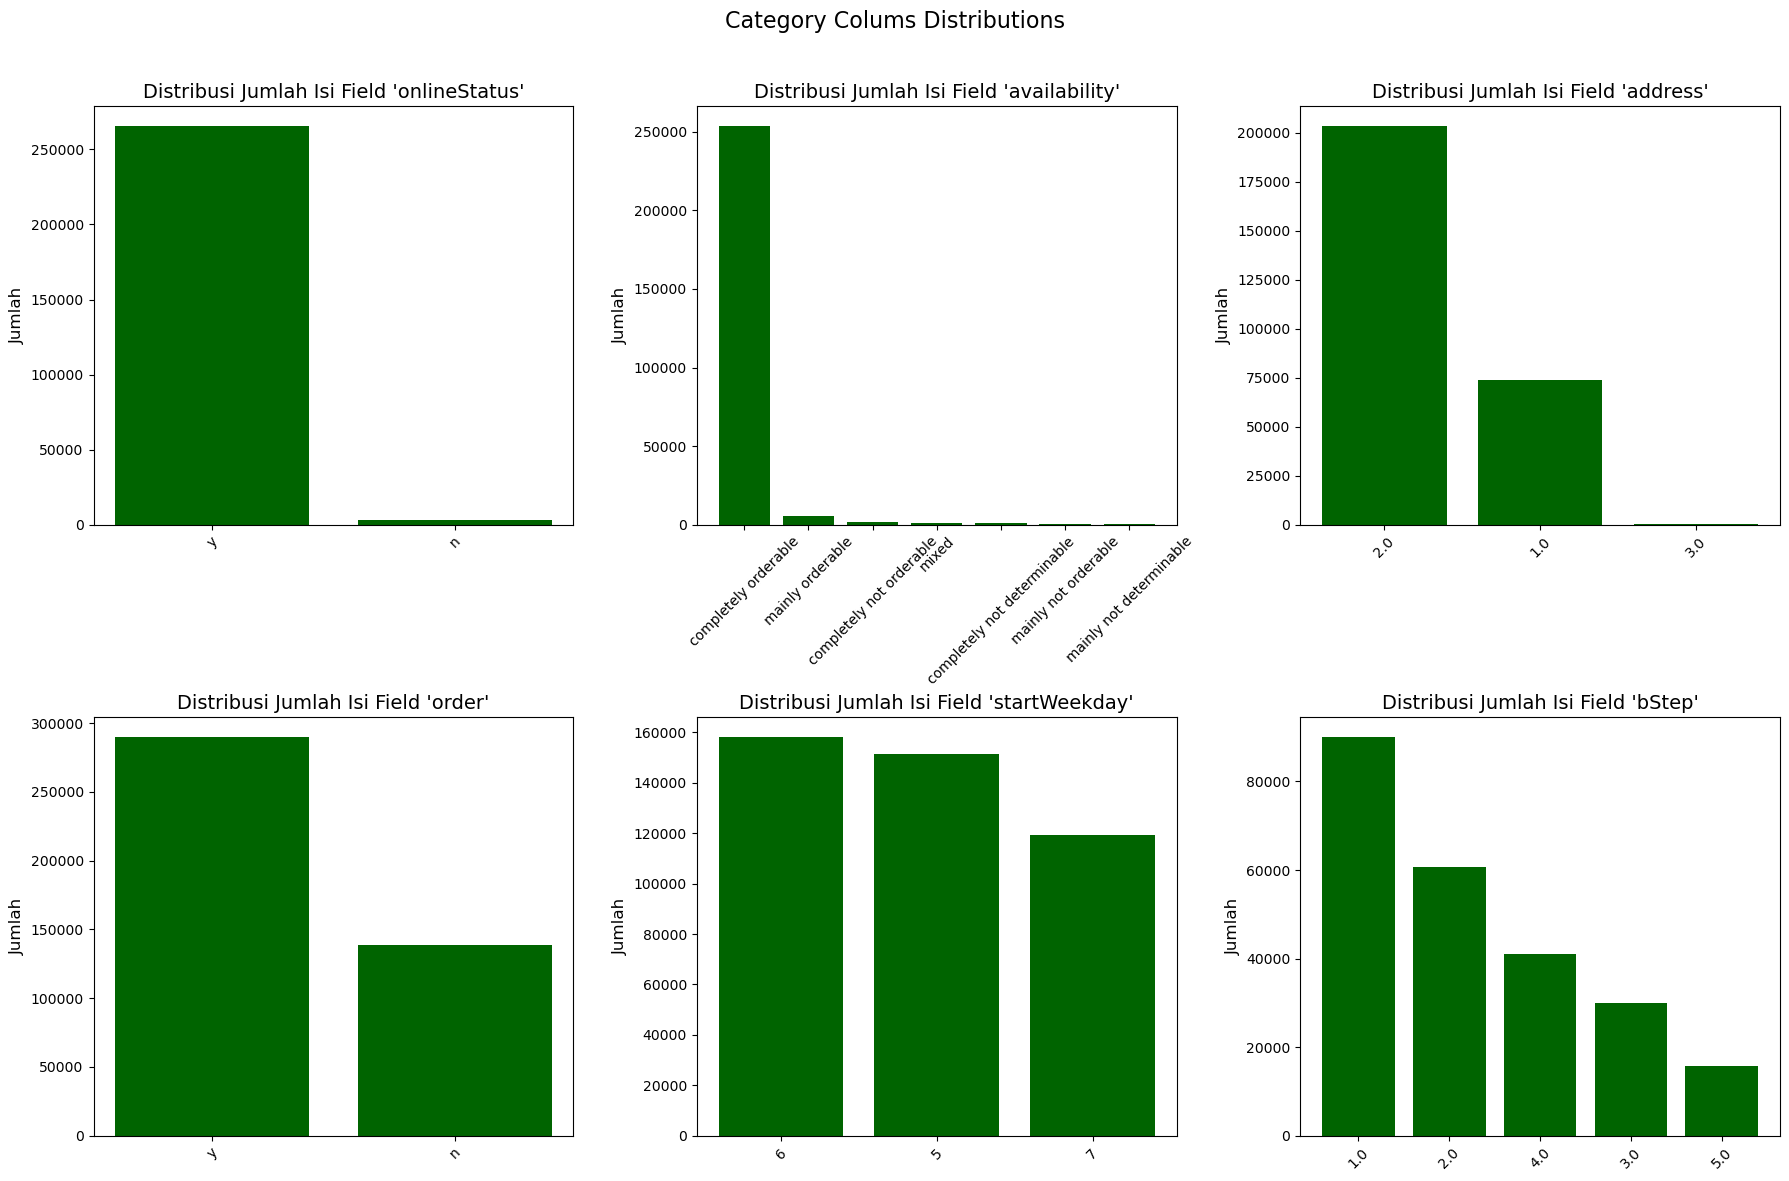

In [229]:
fields = ['onlineStatus', 'availability', 'address', 'order', 'startWeekday', 'bStep']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Category Colums Distributions', fontsize=16)

# Flatten axes array untuk mempermudah indexing
axes = axes.flatten()

# Loop untuk memproses setiap field yang dipilih
for i, field in enumerate(fields):
    if field in df.columns:  # Pastikan field ada di dataset
        # Hitung jumlah masing-masing isi (frekuensi) dari field
        frekuensi = df[field].value_counts()

        # Plot barchart untuk setiap field
        axes[i].bar(frekuensi.index.astype(str), frekuensi.values, color='darkgreen')
        axes[i].set_title(f"Distribusi Jumlah Isi Field '{field}'", fontsize=14)
        axes[i].set_ylabel("Jumlah", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)  # Rotasi label x-axis agar terbaca jelas

# Layout yang lebih rapi
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk title
# Menampilkan semua grafik
plt.show()


Disini kita membuat barchart untuk memvisualisasikan data dan melihat distribusi tiap field nya

## Pra-Proses

In [231]:
# Mengganti '?' dengan NaN
df_testmerged.replace('?', np.nan, inplace=True)

Sebelum jadi "df_testmerged" yang merupakan pengujian data testing,variabel awalnya bernama "df" yang berupa data training untuk melatih mesin dan mengevaluasi hasil test mesin yang nantinya akan di ujikan pada data testing

In [233]:
# Membuat mapping kategori ke angka (mengabaikan NaN)
category_mapping = {category: idx + 1 for idx, category in enumerate(df_testmerged['availability'].dropna().unique())}

# Menambahkan kolom kategori numerik ke dalam dataframe tanpa menghapus kolom lainnya
df_testmerged['availability'] = df_testmerged['availability'].map(category_mapping)


Kami mengubah data kategorikal dalam kolom availability pada DataFrame df_testmerged (sebelumnya "df" sebelum di testing) menjadi data numerik dengan tujuan mempermudah proses analisis atau pemodelan yang membutuhkan data numerik serta memudahkan mesin dalam mencari algoritma dalam memprediksi nantinya.

In [235]:
# Menghitung jumlah per kategori numerik pada kolom 'availability_numeric'
category_counts = df_testmerged['availability'].value_counts().sort_index()

print("\nJumlah per kategori:")
print(category_counts)


Jumlah per kategori:
availability
1.0    26283
2.0      654
3.0      102
4.0       36
5.0      144
6.0       90
7.0        2
Name: count, dtype: int64


Untuk melihat apakah kategori kategori dalam kolom availibility sudah menjadi numeric atau belum dan menghitung jumlah numeric nya

In [237]:
# Membuat mapping kategori ke angka menggunakan enumerate (mengabaikan NaN)
category_mapping = {category: idx + 1 for idx, category in enumerate(df_testmerged['onlineStatus'].dropna().unique())}

# Menambahkan kolom kategori numerik ke dalam dataframe tanpa menghapus kolom lainnya
df_testmerged['onlineStatus'] = df_testmerged['onlineStatus'].map(category_mapping)


Kami mengubah data kategorikal dalam kolom onlineStatus pada DataFrame df_testmerged (sebelumnya "df" sebelum di testing) menjadi data numerik dengan tujuan mempermudah proses analisis atau pemodelan yang membutuhkan data numerik serta memudahkan mesin dalam mencari algoritma dalam memprediksi nantinya.

In [239]:
# Menghitung jumlah per kategori numerik pada kolom 'availability_numeric'
category_counts = df_testmerged['onlineStatus'].value_counts().sort_index()

print("\nJumlah per kategori:")
print(category_counts)


Jumlah per kategori:
onlineStatus
1.0    27494
2.0      219
Name: count, dtype: int64


Untuk melihat apakah kategori kategori dalam kolom onlineStatus sudah menjadi numeric atau belum dan menghitung jumlah numeric nya (1.0 untuk y dan 2.0 untuk n) 

In [241]:
# Membuat mapping kategori ke angka menggunakan enumerate (mengabaikan NaN)
category_mapping = {category: idx + 1 for idx, category in enumerate(df['order'].dropna().unique())}

# Menambahkan kolom kategori numerik ke dalam dataframe tanpa menghapus kolom lainnya
df['order'] = df['order'].map(category_mapping)

Kami mengubah data kategorikal dalam kolom order pada DataFrame df menjadi data numerik dengan tujuan mempermudah proses analisis atau pemodelan yang membutuhkan data numerik serta memudahkan mesin dalam mencari algoritma dalam memprediksi nantinya,juga karena kolom order ini yang akan dibuatkan target class dari training kita.

In [243]:
# Menghitung jumlah per kategori numerik pada kolom 'availability_numeric'
category_counts = df['order'].value_counts().sort_index()

print("\nJumlah per kategori:")
print(category_counts)


Jumlah per kategori:
order
1    290030
2    138983
Name: count, dtype: int64


Untuk melihat apakah kategori kategori dalam kolom order pada data training sudah menjadi numeric atau belum dan menghitung jumlah numeric nya (1.0 untuk y dan 2.0 untuk n) 

## EDA (Exploratory Data Analysis)

1. Statistik Deskriptif

In [245]:
# Menampilkan statistik deskriptif
df_testmerged.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,prediction
count,45068.000000,45068.000000,45068.000000,45068.000000,45068.000000,44742.000000,44742.000000,44742.000000,45068.000000,44479.000000,...,27311.000000,27804.000000,27616.000000,27616.000000,27616.000000,27804.000000,27786.000000,27804.000000,27804.000000,45068.000000
mean,2385.701185,18.589509,6.458418,1645.291183,27.316810,53.299304,149.135132,1240.985675,4.366668,65.935684,...,1.073377,25236.189433,2039.006373,481.638579,129.780997,9.951014,43.281941,1.744497,94.915264,0.680616
std,1426.206838,5.543531,1.719373,2279.003964,32.549188,146.774665,272.250373,3523.665302,4.333860,172.340996,...,0.463416,4087.158333,2157.553606,141.709457,104.308406,13.388516,11.526591,0.439028,125.050807,0.466243
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,47.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,4.000000,0.000000
25%,1166.000000,19.000000,7.000000,259.884500,6.000000,5.000000,29.990000,154.370000,1.000000,7.990000,...,1.000000,25478.000000,600.000000,483.000000,43.000000,2.000000,35.000000,1.000000,16.000000,0.000000
50%,2331.000000,20.000000,7.000000,864.808000,15.000000,9.990000,49.990000,445.540000,3.000000,12.990000,...,1.000000,26090.000000,1200.000000,524.000000,102.000000,7.000000,43.000000,2.000000,42.000000,1.000000
75%,3600.000000,21.000000,7.000000,2148.555000,36.000000,24.990000,99.990000,1164.570000,6.000000,29.990000,...,1.000000,26681.000000,3000.000000,558.000000,213.000000,13.000000,50.000000,2.000000,123.000000,1.000000
max,5111.000000,23.000000,7.000000,21320.113000,200.000000,1999.990000,4799.000000,117310.700000,43.000000,1999.990000,...,7.000000,27318.000000,25000.000000,614.000000,524.000000,278.000000,90.000000,3.000000,733.000000,1.000000


Menampilkan deskripsi statistik dari hasil merged data test dengan data test answer

2. Korelasi Antar Field

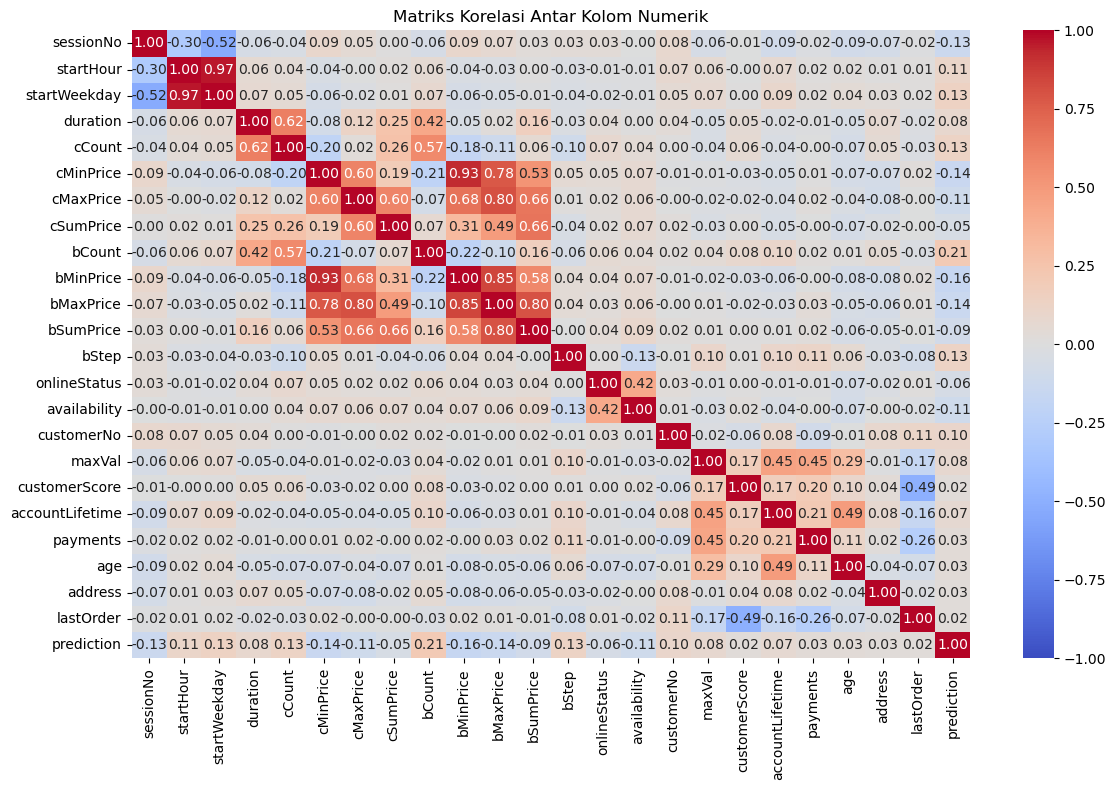

In [247]:
# Menghitung matriks korelasi untuk kolom numerik
correlation_matrix = df_testmerged.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Antar Kolom Numerik')
plt.tight_layout()
plt.show()

Disini kita memvisualisasikan korelasi antar field menggunakan heatmap untuk mengidentifikasi fitur penting dan mengetahui hubungan antar field.Korelasi yang menunjukkan hampir mendekati 0 dianggap tidak relevan terhadap prediction dan kolom yang negatif dianggap negatif bagi prediction,sehingga kita bisa memilah nantinya.

3. Distribusi Data

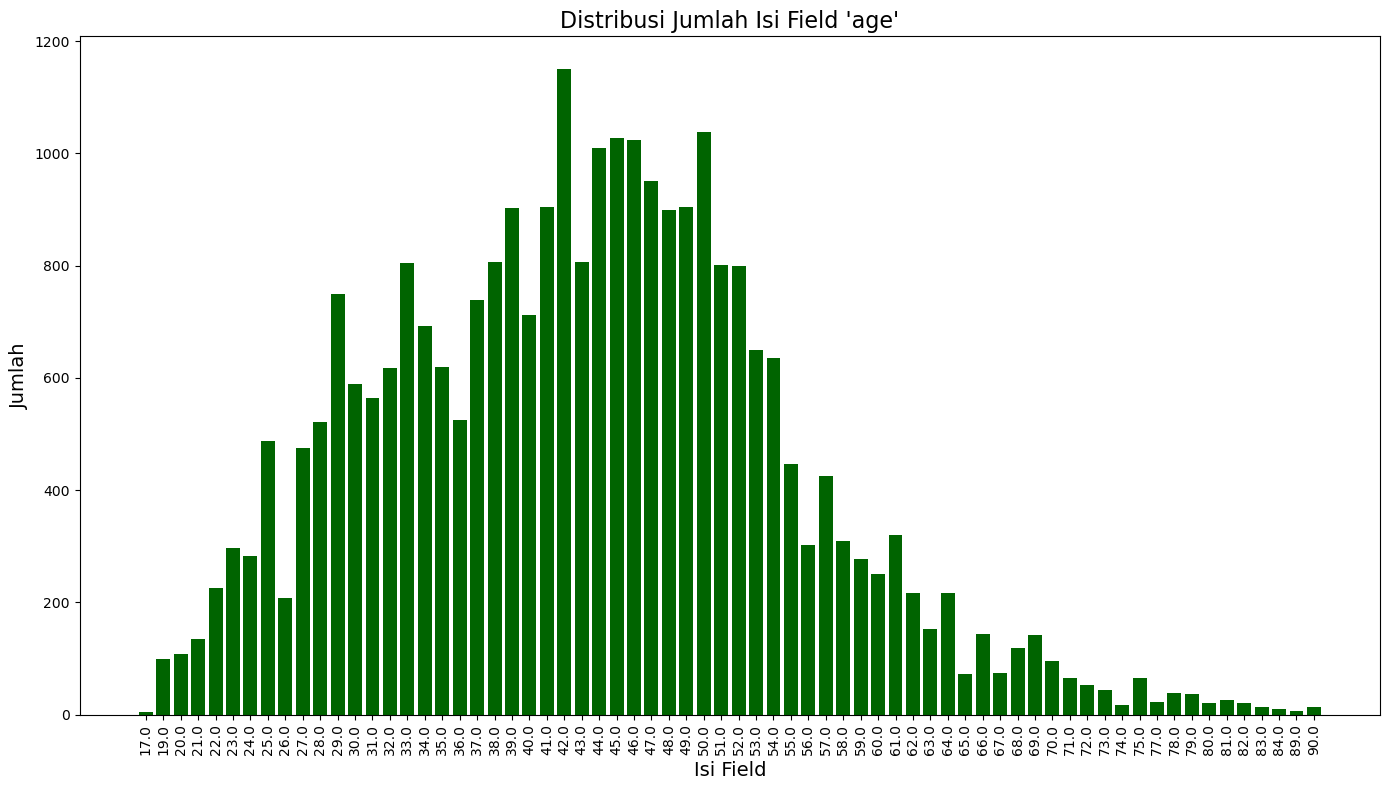

In [249]:
# Pilih field yang ingin divisualisasikan
field = 'age'  # Ganti dengan nama kolom sesuai kebutuhan

# Hitung jumlah masing-masing isi dalam field
frekuensi = df_testmerged[field].value_counts().sort_index()  # Mengurutkan berdasarkan nilai di index (umur)

# Membuat barchart dengan ukuran figure yang lebih besar
plt.figure(figsize=(14, 8))

# Membuat bar chart
plt.bar(frekuensi.index.astype(str), frekuensi.values, color='darkgreen')

# Menambahkan judul dan label
plt.title(f"Distribusi Jumlah Isi Field '{field}'", fontsize=16)
plt.xlabel("Isi Field", fontsize=14)
plt.ylabel("Jumlah", fontsize=14)

# Mengatur label sumbu X agar tidak bertumpuk
plt.xticks(rotation=90, ha='center', fontsize=10)  # Rotasi 90 derajat dan font lebih kecil

# Menyempurnakan layout untuk memastikan semua label terlihat
plt.tight_layout()

# Menampilkan plot
plt.show()

Disini Field "age" divisualisasikan untuk melihat distribusinya

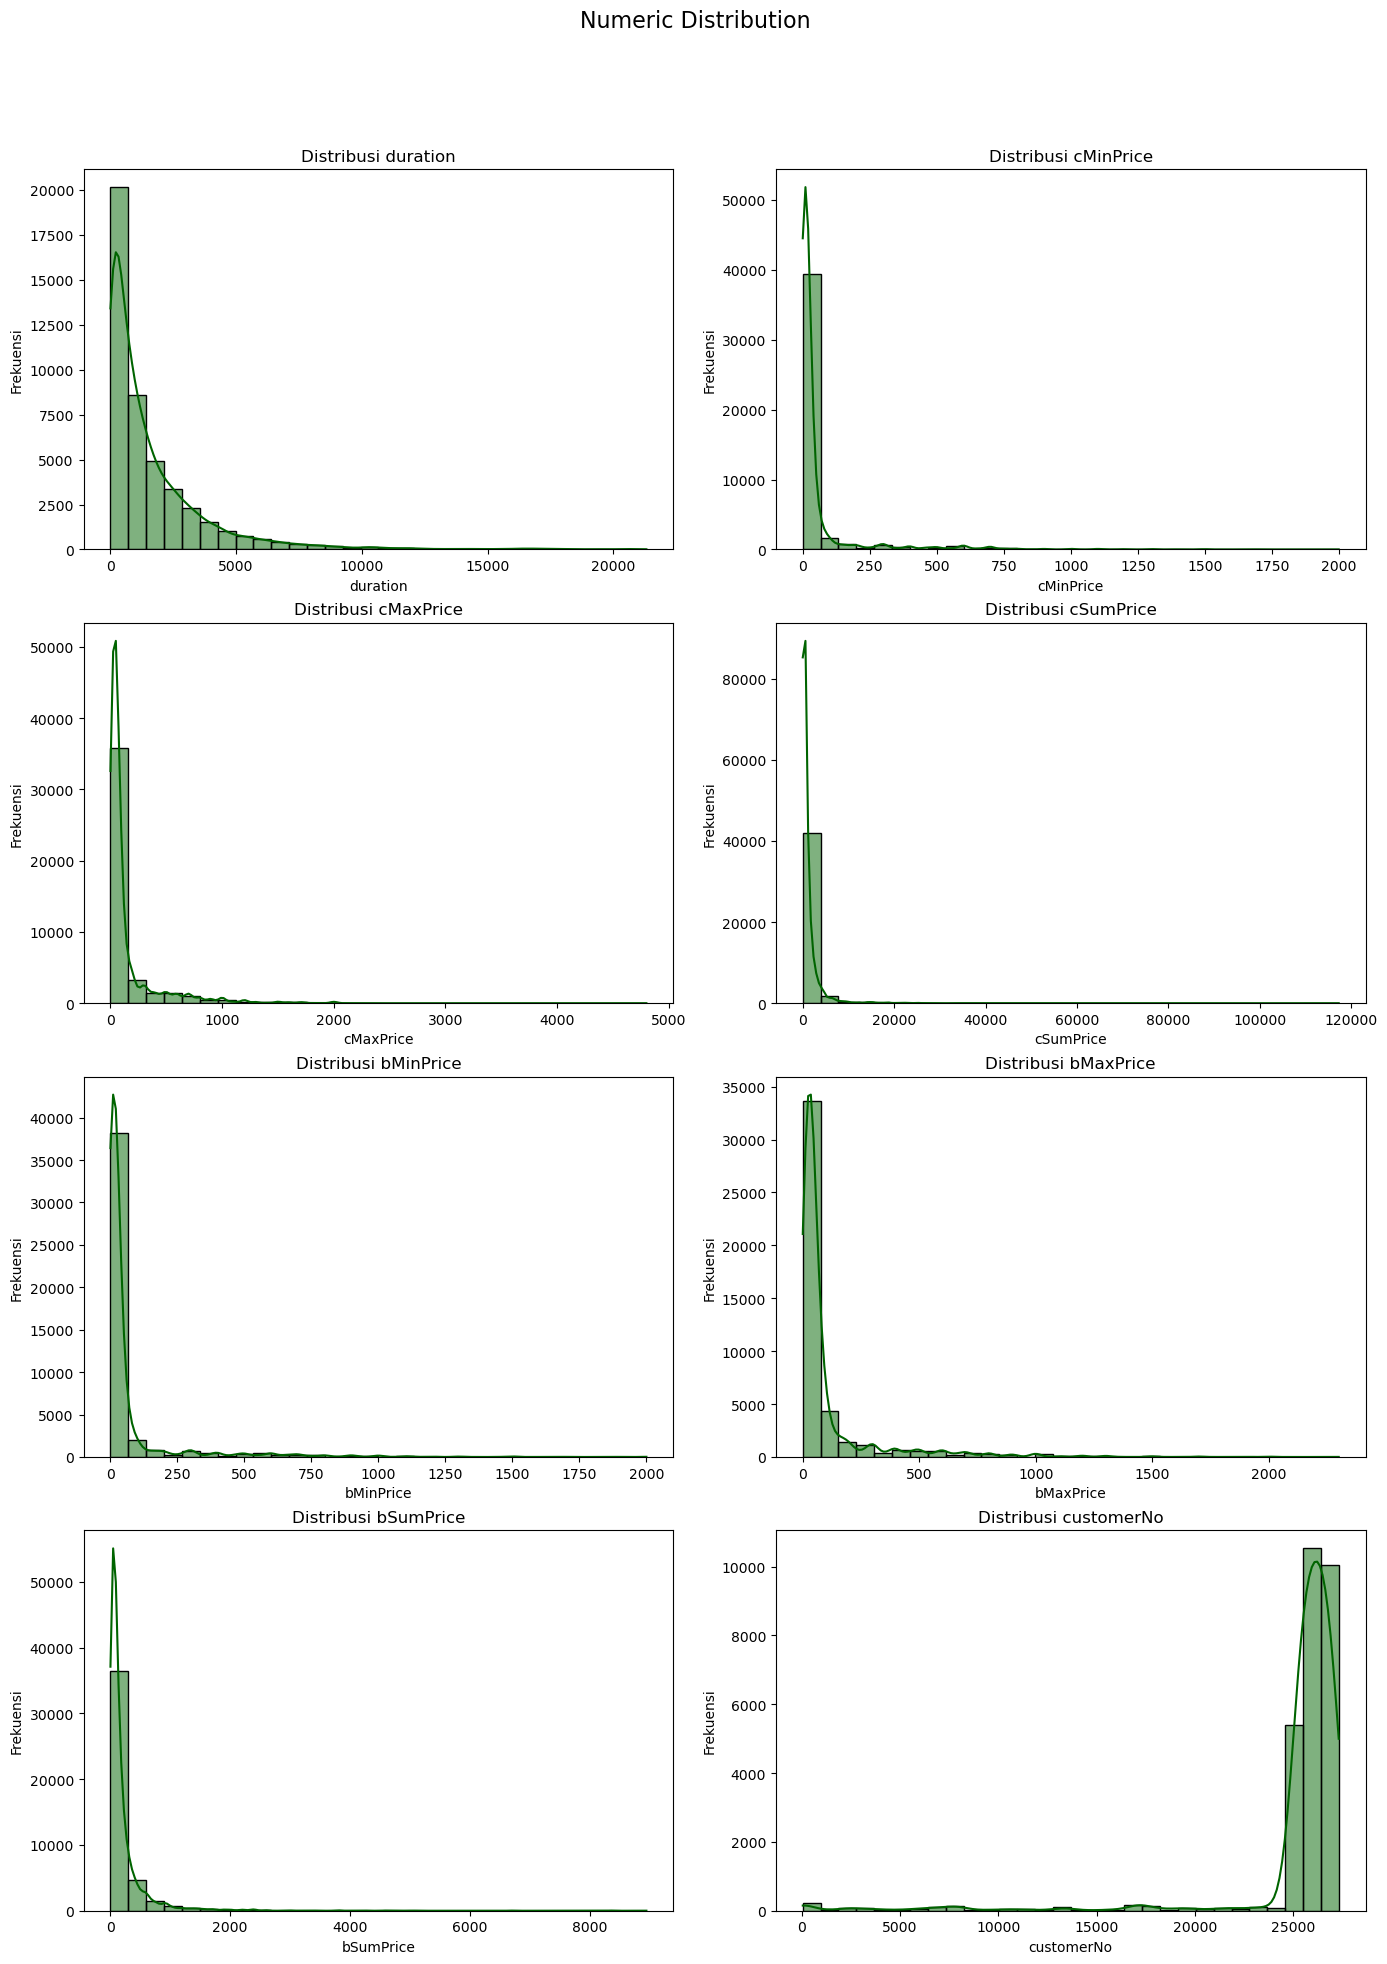

In [251]:
# Pilih kolom numerik yang akan divisualisasikan
numeric_columns = ['duration', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'customerNo']

# Membuat subplot untuk menampilkan distribusi dengan grid 4x2
fig, axs = plt.subplots(4, 2, figsize=(14, 20))  # 4 baris dan 2 kolom
fig.suptitle('Numeric Distribution', fontsize=16)

# Mengatur layout grid agar tidak tumpang tindih
axs = axs.flatten()

# Loop untuk membuat distribusi untuk masing-masing kolom numerik
for i, col in enumerate(numeric_columns):
    sns.histplot(df_testmerged[col], kde=True, bins=30, ax=axs[i], color='darkgreen')
    axs[i].set_title(f'Distribusi {col}', fontsize=12)
    axs[i].set_xlabel(col, fontsize=10)
    axs[i].set_ylabel('Frekuensi', fontsize=10)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Memberikan ruang untuk title
plt.show()

Disini Field "'duration', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'customerNo'" divisualisasikan untuk melihat distribusinya

In [253]:
df_testmerged.isna().sum()

sessionNo              0
startHour              0
startWeekday           0
duration               0
cCount                 0
cMinPrice            326
cMaxPrice            326
cSumPrice            326
bCount                 0
bMinPrice            589
bMaxPrice            589
bSumPrice            589
bStep              20766
onlineStatus       17355
availability       17757
customerNo         17264
maxVal             17452
customerScore      17452
accountLifetime    17452
payments           17264
age                17282
address            17264
lastOrder          17264
prediction             0
dtype: int64

Untuk melihat jumlah data yang masih NaN dalam setiap field

In [255]:
# Mengonversi semua kolom menjadi numerik
for col in df_testmerged.columns:
    df_testmerged[col] = pd.to_numeric(df_testmerged[col], errors='coerce')  # Mengubah nilai yang tidak bisa menjadi NaN

# Mengganti 0.0, 0, atau nilai lain yang tidak relevan dengan NaN
df_testmerged.replace([0.0, 0], np.nan, inplace=True)

# Menampilkan deskripsi statistik setelah penggantian
print(df_testmerged.describe())

df_testmerged.head()

          sessionNo     startHour  startWeekday      duration        cCount  \
count  45068.000000  43514.000000  45068.000000  42904.000000  44926.000000   
mean    2385.701185     19.253390      6.458418   1728.276688     27.403152   
std     1426.206838      4.364171      1.719373   2304.866320     32.564279   
min        1.000000      1.000000      1.000000      0.001000      1.000000   
25%     1166.000000     19.000000      7.000000    328.347750      6.000000   
50%     2331.000000     20.000000      7.000000    950.139000     15.000000   
75%     3600.000000     21.000000      7.000000   2248.051250     37.000000   
max     5111.000000     23.000000      7.000000  21320.113000    200.000000   

          cMinPrice     cMaxPrice      cSumPrice        bCount     bMinPrice  \
count  44281.000000  44741.000000   44741.000000  44701.000000  44202.000000   
mean      53.854192    149.138465    1241.013412      4.402519     66.348882   
std      147.435413    272.252502    3523.699797

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,prediction
0,1,18.0,7,136.833,3.0,39.99,39.99,79.98,1.0,39.99,...,1.0,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1.0
1,1,18.0,7,189.984,3.0,39.99,39.99,79.98,1.0,39.99,...,1.0,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1.0
2,1,18.0,7,342.894,6.0,16.99,39.99,113.96,2.0,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1.0
3,1,18.0,7,411.051,8.0,16.99,39.99,149.94,3.0,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1.0
4,1,18.0,7,460.049,10.0,16.99,39.99,189.92,4.0,16.99,...,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0,1.0


Disini kita mengkonversi semua kolom menjadi numerik dan merubah nilai yang mengandung 0 atau 0.0 menjadi NaN

# Training 1

In [257]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import pickle
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

Import library dari scikit learn berupa preprocessing, train_test_split, classification_report_accuracy_score, confusion_matrix, RandomForestClassifier, GaussianNB, tree, pickle, xgboost, joblib, load_iris.

In [259]:
df_testmerged = df_testmerged.copy()

Kita copy data merged test kita (sebelum ini kita menggunakan "df" untuk training) agar data aman dan tidak merandom lagi

In [261]:
# Langkah 1: Menggunakan LabelEncoder untuk kolom 'prediction' sebagai target
le = preprocessing.LabelEncoder()
le.fit(df_testmerged['prediction'])  # Menyesuaikan LabelEncoder dengan kolom 'prediction'

# Transformasi target kolom 'prediction' menjadi numerik
Y = le.transform(df_testmerged['prediction'])  # Mengonversi 'y' ke 1 dan 'n' ke 0

# Langkah 2: Menyusun fitur (X) dengan menghapus kolom 'prediction'
X = df_testmerged.drop('prediction', axis=1)  # Fitur lainnya


Menggunakan LabelEncoder untuk kolom prediction (sebelumnya order dalam proses training) sebagai target class yang ingin diprediksinya dan transformasi menjadi numerik.Fitur X adalah data yang digunakan untuk memprediksi target class prediction (sebelumnya order dalam proses training).Oleh karena itu, kolom prediction harus dihapus dari DataFrame karena kolom ini adalah target dan tidak seharusnya menjadi bagian dari fitur

In [308]:
# Memisahkan antara data train dengan data test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

Membagi data menjadi 80% untuk training dan 20% untuk testing secara random tetapi kita menggunakan random_state sehingga ketika kode di run kembali,kondisi awal state nya tidak mengacak kembali

In [265]:
# Menjalankan XGBoost
clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric="mlogloss",
                        max_depth=15, gamma=0.8, subsample=0.9, learning_rate=0.09,
                        n_estimators=50, seed=27,
                        colsample_bytree=0.9, nthread=4)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_XGB = accuracy_score(Y_test, Y_pred)

# Mencetak hasil dari XGBoost
print("Akurasi {}".format(acc_XGB))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9376525404925671
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6092
           1       0.92      0.89      0.90      2922

    accuracy                           0.94      9014
   macro avg       0.93      0.93      0.93      9014
weighted avg       0.94      0.94      0.94      9014



Menggunakan model machine learning xgboost untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

In [267]:
# Inisialisasi model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=27, max_depth=15, n_jobs=-1)

# Melatih model dengan data latih
rf_clf.fit(X_train, Y_train)

# Prediksi dengan data uji
Y_pred_rf = rf_clf.predict(X_test)

# Menghitung akurasi
acc_rf = accuracy_score(Y_test, Y_pred_rf)

# Mencetak hasil dari Random Forest
print("Akurasi Random Forest: {}".format(acc_rf))
print(classification_report(Y_test, Y_pred_rf))

Akurasi Random Forest: 0.9032615930774351
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6092
           1       0.89      0.80      0.84      2922

    accuracy                           0.90      9014
   macro avg       0.90      0.88      0.89      9014
weighted avg       0.90      0.90      0.90      9014



Menggunakan model machine learning RandomForest untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

In [269]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_DT = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc_DT))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9111382294209008
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6092
           1       0.87      0.86      0.86      2922

    accuracy                           0.91      9014
   macro avg       0.90      0.90      0.90      9014
weighted avg       0.91      0.91      0.91      9014



Menggunakan model machine learning DecisionTree untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

# Training 2

In [152]:
df_testmerged = df_testmerged.drop(['customerNo', 'maxVal', 'startWeekday', 'duration', 'startHour', 'lastOrder', 'address', 'bSumPrice', 'cSumPrice'], axis=1)

Setelah proses training pertama kita selesai,kemudian agar memaksimalkan lagi kinerja machine learning yang kita gunakan,disini kita menghapus beberapa field yang menurut kami kurang menunjang proses prediksi pada mesin,field 'customerNo' kita hapus dikarenakan pada field tersebut ada customerNo yang seutuhnya null dalam satu sesi dan menurut kami tidak bisa tangani dengan hanya mengandalkan field dirinya sendiri atau field yang lain,harus ada campur tangan sistem yang memberikan customerNo pada data set,kemudian untuk field 'maxVal' kami tidak bisa menentukan berapa 'maxVal' seseorang hanya melihat data set yang ada,harus ada kebijakan dan sistem yang mengatur setiap 'maxVal' customer.Lalu untuk 'startWeekday' kami drop dikarenakan menurut kami field tersebut kurang korelasinya dengan prediksi order y atau n,untuk 'duration' kita drop karena sebelum masuk ke testing data ini ketika masih di training data kita sudah melihat field mana saja yang berpengaruh besar terhadap proses prediksi dan field 'duration'ini termasuk golongan dengan pengaruh kecil.Untuk 'startHour','lastOrder','address','bSumPrice', dan 'cSumPrice' kami drop dikarenakan field field tersebut tidak dapat ditentukan oleh fieldnya sendiri ataupun field field yang lainnya,harus ada penanganan oleh sistem dan authoritas berwenang dari sistem toko online nya.

In [154]:
# Fungsi untuk mengisi NaN dengan modus per sesi
def fill_with_mode_per_session(series):
    mode = series.mode()
    if mode.empty:  # Jika seluruh nilai dalam grup NaN, biarkan NaN
        return series
    else:
        return series.fillna(mode[0])

# Terapkan fungsi untuk mengisi NaN dalam bStep
df_testmerged['bStep'] = df_testmerged.groupby('sessionNo')['bStep'].transform(lambda x: fill_with_mode_per_session(x))


Disini kita menangani field 'bStep' yang memuat nilai NaN pada salah satu sesi nya dan diisi dengan nilai modus per sesi
'bStep' nya

In [156]:
# Langkah 1: Analisis distribusi nilai tidak null
value_counts = df_testmerged['bStep'].value_counts(normalize=True, dropna=True)

# Langkah 2: Proporsi distribusi
proportions = value_counts.to_dict()

# Langkah 3: Imputasi nilai null berdasarkan distribusi
df_testmerged['bStep'] = df_testmerged['bStep'].apply(
    lambda x: np.random.choice(list(proportions.keys()), p=list(proportions.values())) if pd.isnull(x) else x
)

Dalam kode ini kita mengisi nilai yang null pada seluruh bStep di sesi nya dengan metode imputasi berdasarkan distribusi proporsional nilai yang ada.Jadi Misalkan dalam sessionNo 6 semua bstep nya null,maka kita isikan dengan nilai dari metode imputasi berdasarkan distribusi proporsional pada nilai yang ada

In [158]:
# Mengisi NaN di kolom 'onlineStatus' dengan angka 1.0 atau 2.0 secara acak
df_testmerged['onlineStatus'] = df_testmerged['onlineStatus'].apply(lambda x: np.random.choice([1.0, 2.0]) if pd.isna(x) else x)

Untuk menyeimbangkan data pada field tersebut kita memilih untuk mengisi NaN dengan nilai acak antara 1.0 atau 2.0 yang berarti y atau n.

In [160]:
# Misalkan df adalah DataFrame yang sudah ada
# Urutkan berdasarkan sessionNo
df_testmerged = df_testmerged.sort_values(by=['sessionNo'])

# Ambil nilai unique sessionNo yang memiliki nilai NaN pada 'age'
nan_sessions = df_testmerged[df_testmerged['age'].isna()]['sessionNo'].unique()

# Inisialisasi nilai age yang akan diisi
age_to_fill = 17  # mulai dari usia yang Anda inginkan, misalnya 17

# Loop melalui setiap sessionNo yang memiliki NaN pada age
for session in nan_sessions:
    # Temukan baris dengan sessionNo yang memiliki NaN pada 'age'
    rows_to_fill = df_testmerged[(df_testmerged['sessionNo'] == session) & df_testmerged['age'].isna()]
    
    # Loop untuk mengisi satu per satu
    for idx in rows_to_fill.index:
        df_testmerged.at[idx, 'age'] = age_to_fill
        age_to_fill += 1  # Increment usia untuk pengisian berikutnya


Untuk mengisi nilai NaN pada field age. dimana dengan cara mengisi dengan nilai yang sudah ada pada field. dan di isi ke masing masing field NaN secara berurutan

In [162]:
# Melakukan interpolasi untuk kolom yang memiliki nilai NaN
df_testmerged['cMinPrice'] = df_testmerged['cMinPrice'].interpolate(method='linear', limit_direction='both').round(2)
df_testmerged['cMaxPrice'] = df_testmerged['cMaxPrice'].interpolate(method='linear', limit_direction='both').round(2)
df_testmerged['bMinPrice'] = df_testmerged['bMinPrice'].interpolate(method='linear', limit_direction='both').round(2)
df_testmerged['bMaxPrice'] = df_testmerged['bMaxPrice'].interpolate(method='linear', limit_direction='both').round(2)


Untuk mengisi nilai NaN pada field cMinPrice. cMaxPrice, bMinPrice, bMaxPrice. dengan cara interpolasi dimana mengambil nilai tengah dari kolom atas dan bawahnya

In [164]:
df_testmerged['availability'] = df_testmerged['availability'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [166]:
df_testmerged['customerScore'] = df_testmerged['customerScore'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [168]:
df_testmerged['accountLifetime'] = df_testmerged['accountLifetime'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [170]:
df_testmerged['payments'] = df_testmerged['payments'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [172]:
df_testmerged['bCount'] = df_testmerged['bCount'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [174]:
df_testmerged['cCount'] = df_testmerged['cCount'].fillna(0.0)

Untuk mengisi nilai NaN dengan 0.0

In [177]:
# Langkah 1: Menggunakan LabelEncoder untuk kolom 'prediction' sebagai target
le = preprocessing.LabelEncoder()
le.fit(df_testmerged['prediction'])  # Menyesuaikan LabelEncoder dengan kolom 'prediction'

# Transformasi target kolom 'prediction' menjadi numerik
Y = le.transform(df_testmerged['prediction'])  # Mengonversi 'y' ke 1 dan 'n' ke 0

# Langkah 2: Menyusun fitur (X) dengan menghapus kolom 'prediction'
X = df_testmerged.drop('prediction', axis=1)  # Fitur lainnya


Menggunakan LabelEncoder untuk kolom prediction (sebelumnya order dalam proses training) sebagai target class yang ingin diprediksinya dan transformasi menjadi numerik.Fitur X adalah data yang digunakan untuk memprediksi target class prediction (sebelumnya order dalam proses training).Oleh karena itu, kolom prediction harus dihapus dari DataFrame karena kolom ini adalah target dan tidak seharusnya menjadi bagian dari fitur

In [306]:
# Memisahkan antara data train dengan data test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)


Membagi data menjadi 80% untuk training dan 20% untuk testing secara random tetapi kita menggunakan random_state sehingga ketika kode di run kembali,kondisi awal state nya tidak mengacak kembali

In [182]:
# Menjalankan XGBoost
clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric="mlogloss",
                        max_depth=15, gamma=0.8, subsample=0.9, learning_rate=0.09,
                        n_estimators=50, seed=27,
                        colsample_bytree=0.9, nthread=4)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_XGB = accuracy_score(Y_test, Y_pred)

# Mencetak hasil dari XGBoost
print("Akurasi {}".format(acc_XGB))
print(classification_report(Y_test, Y_pred))

Akurasi 0.945418238295984
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6092
           1       0.93      0.90      0.91      2922

    accuracy                           0.95      9014
   macro avg       0.94      0.93      0.94      9014
weighted avg       0.95      0.95      0.95      9014



Menggunakan model machine learning xgboost untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

In [184]:
# Inisialisasi model Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=27, max_depth=15, n_jobs=-1)

# Melatih model dengan data latih
rf_clf.fit(X_train, Y_train)

# Prediksi dengan data uji
Y_pred_rf = rf_clf.predict(X_test)

# Menghitung akurasi
acc_rf = accuracy_score(Y_test, Y_pred_rf)

# Mencetak hasil dari Random Forest
print("Akurasi Random Forest: {}".format(acc_rf))
print(classification_report(Y_test, Y_pred_rf))

Akurasi Random Forest: 0.9164632793432439
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6092
           1       0.91      0.82      0.86      2922

    accuracy                           0.92      9014
   macro avg       0.92      0.89      0.90      9014
weighted avg       0.92      0.92      0.92      9014



Menggunakan model machine learning RandomForest untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

In [186]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_DT = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc_DT))
print(classification_report(Y_test, Y_pred))

Akurasi 0.9221211448857333
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6092
           1       0.88      0.88      0.88      2922

    accuracy                           0.92      9014
   macro avg       0.91      0.91      0.91      9014
weighted avg       0.92      0.92      0.92      9014



Menggunakan model machine learning DecisionTree untuk training data dan terakhir untuk data testing setelah penyempurnaan di proses training data

In [188]:
df_acc = pd.DataFrame({'Decission_Tree': [acc_DT],
                       'Random_Forest': [acc_rf], 'XGBoost': [acc_XGB]})
df_acc

,Decission_Tree,Random_Forest,XGBoost
0,0.922121,0.916463,0.945418


## Kesimpulan

Bisa kita lihat disini untuk proses testing terakhir menunjukkan kenaikkan pada f1 score,recall,dan precision untuk ketiga model machine learning nya.Model yang menurut kami optimal untuk memprediksi ini yaitu adalah decision tree dikarenakan precision,recall,f1-score,dan yang lainnya tidak melebihi angka 0,95 dan tidak dibawah 0,70.